# Generate new images using trained Progressive GAN models

## Loading trained model into the notebook

Below we copy the files from training on Cloud ML Engine onto the local filesystem of the kernel.

In [28]:
import os

os.environ['BUCKET'] = 'celeba-progressive-gan'
os.environ['MODEL_DIR'] = 'models/20210426005031/gen'

In [35]:
%%bash

mkdir -p ./savedmodel/
gsutil cp -r gs://${BUCKET}/${MODEL_DIR}/* ./savedmodel/

Copying gs://celeba-progressive-gan/models/20210426005031/gen/saved_model.pb...
/ [1 files][487.7 KiB/487.7 KiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://celeba-progressive-gan/models/20210426005031/gen/variables/variables.data-00000-of-00001...
Copying gs://celeba-progressive-gan/models/20210426005031/gen/variables/variables.index...
\ [3 files][ 43.5 MiB/ 43.5 MiB]                                                
Operation completed over 3 objects/43.5 MiB.                                     


Next we load the generator model into the notebook so we can generate new images with the trained weights.

In [41]:
import sys

sys.path.append('./progan')

In [42]:
from trainer import model

In [43]:
import tensorflow as tf

G = tf.keras.models.load_model('./savedmodel/', custom_objects={'G': model.G})

In [ ]:
# Use this cell to determine if the model was loaded correctly.

G.summary()

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_generated_images(G,
                          latent_size,
                          n_to_show=20,
                          n_rows=5,
                          figsize=(8, 10),
                          alpha=1.0):
  """Plot images made by a generator."""
  latents_in = np.random.normal(size=(n_to_show, latent_size))
  X_gen = G.predict(latents_in)
  
  fig = plt.figure(figsize=(8, 10))

  for i, x in enumerate(X_gen):
    ax = fig.add_subplot(n_rows, n_to_show // n_rows, i + 1)
    ax.axis('off')
    ax.imshow(np.clip(np.array(x).squeeze(), 0.0, 1.0),
              interpolation='antialiased')

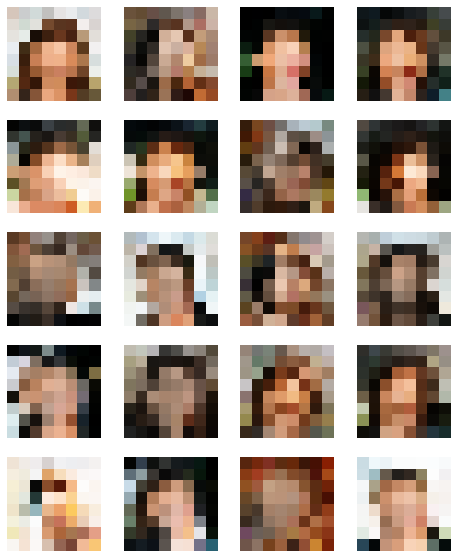

In [39]:
plot_generated_images(G, latent_size=512)